In [11]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Data Collection

In [2]:
data = pd.read_csv('../data/dataset.csv')

In [3]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# EDA

Option 01: manual EDA

Option 02: Automated EDA

In [31]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ydata_profiling import ProfileReport

In [12]:
profile = ProfileReport(data, title="Diabetes Data Profiling Report")
profile.to_file('diabetes.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Create Training and Test Set

In [14]:
from sklearn.model_selection import train_test_split

# Randomly split the data into training and test set
train, test = train_test_split(data, test_size=0.2, random_state=42)

print(train.shape)
print(test.shape)

(202944, 22)
(50736, 22)


In [19]:
data['Income'].describe()

count    253680.000000
mean          6.053875
std           2.071148
min           1.000000
25%           5.000000
50%           7.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64

In [22]:
import numpy as np

bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf]

data['Income_cat'] = pd.cut(data["Income"], bins)

In [23]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Income_cat
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,"(1.5, 3.0]"
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,"(0.0, 1.5]"
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,"(6.0, inf]"
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,"(4.5, 6.0]"
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,"(3.0, 4.5]"


In [24]:
data[['Income', 'Income_cat']].sample(10)

,Income,Income_cat
152477,8.0,"(6.0, inf]"
223624,8.0,"(6.0, inf]"
114771,8.0,"(6.0, inf]"
33527,7.0,"(6.0, inf]"
120679,5.0,"(4.5, 6.0]"
12196,3.0,"(1.5, 3.0]"
214927,2.0,"(1.5, 3.0]"
222448,8.0,"(6.0, inf]"
7592,6.0,"(4.5, 6.0]"
97263,1.0,"(0.0, 1.5]"


In [27]:
data['Income_cat'].value_counts() / len(data) * 100

Income_cat
(6.0, inf]    52.666351
(4.5, 6.0]    24.579391
(1.5, 3.0]    10.949622
(3.0, 4.5]     7.937165
(0.0, 1.5]     3.867471
Name: count, dtype: float64

In [28]:
train_set, test_set = train_test_split(data,
                                       test_size=0.2,
                                       random_state=12312)
strat_train_set, strat_test_set = train_test_split(data,
                                       test_size=0.2,
                                       random_state=12312,
                                       stratify=data["Income_cat"])

In [33]:
def Income_cat_proportions(data):
    return data['Income_cat'].value_counts() / len(data)

Income_cat_proportions(test_set)

Income_cat
(6.0, inf]    0.530570
(4.5, 6.0]    0.245881
(1.5, 3.0]    0.105960
(3.0, 4.5]    0.079687
(0.0, 1.5]    0.037902
Name: count, dtype: float64

In [40]:
def Income_cat_proportions(data):
    return data['Income_cat'].value_counts() / len(data)

compare_props = pd.DataFrame({
    'overall': Income_cat_proportions(data),
    'Stratified': Income_cat_proportions(strat_test_set),
    'Random': Income_cat_proportions(test_set),
}).sort_index()

compare_props['Rand. %error'] = 100 * (compare_props['Random'] / compare_props['overall'] - 100)
compare_props['Strat. %error'] = 100 * (compare_props['Stratified'] / compare_props['overall'] - 100)

compare_props

,overall,Stratified,Random,Rand. %error,Strat. %error
Income_cat,,,,,
"(0.0, 1.5]",0.038675,0.038671,0.037902,-9901.997758,-9900.010193
"(1.5, 3.0]",0.109496,0.109488,0.105960,-9903.229290,-9900.007200
"(3.0, 4.5]",0.079372,0.079372,0.079687,-9899.602682,-9900.000000
"(4.5, 6.0]",0.245794,0.245802,0.245881,-9899.964717,-9899.996792
"(6.0, inf]",0.526664,0.526667,0.530570,-9899.258256,-9899.999252


In [41]:
Income = strat_test_set.drop("Income_cat", axis=1)

print(Income.shape)

(50736, 22)


# Data Cleaning

## Missing value handling

In [42]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [44]:
import missingno as msno
import matplotlib.pyplot as plt

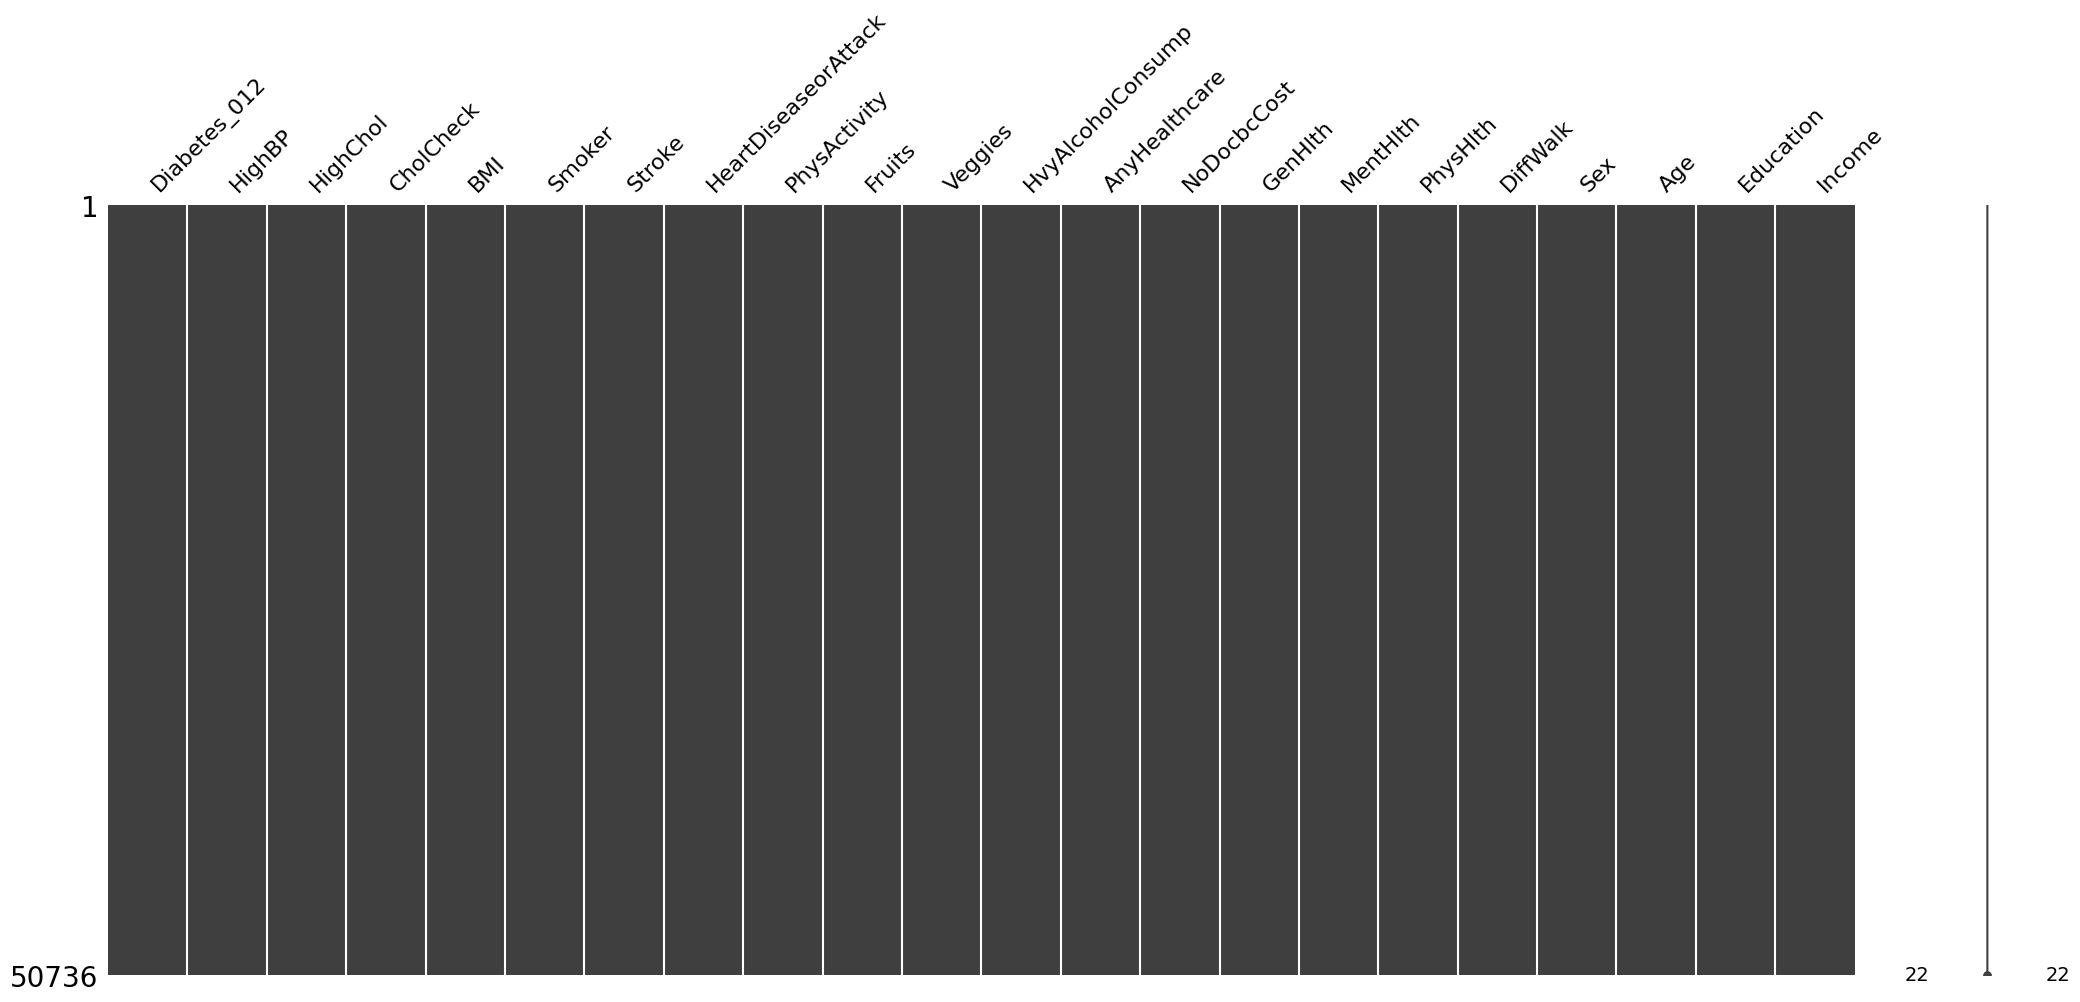

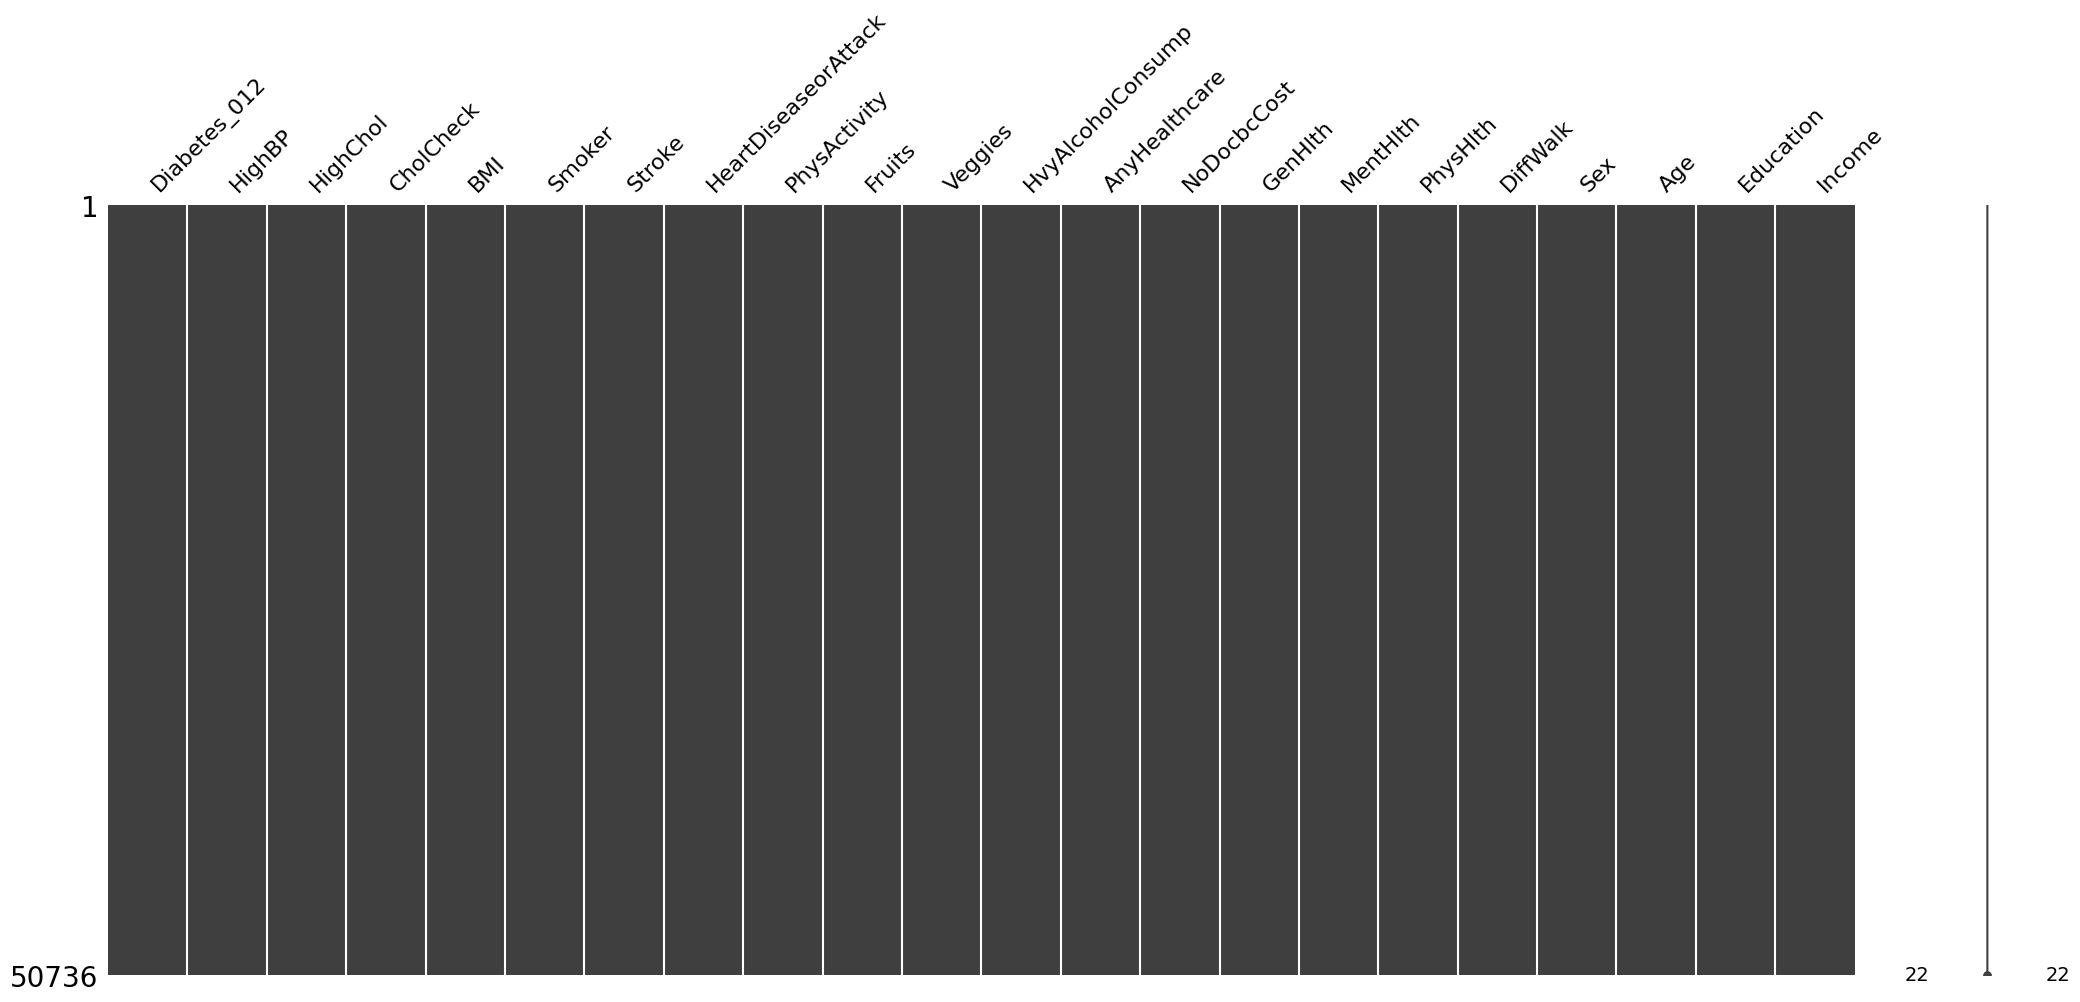

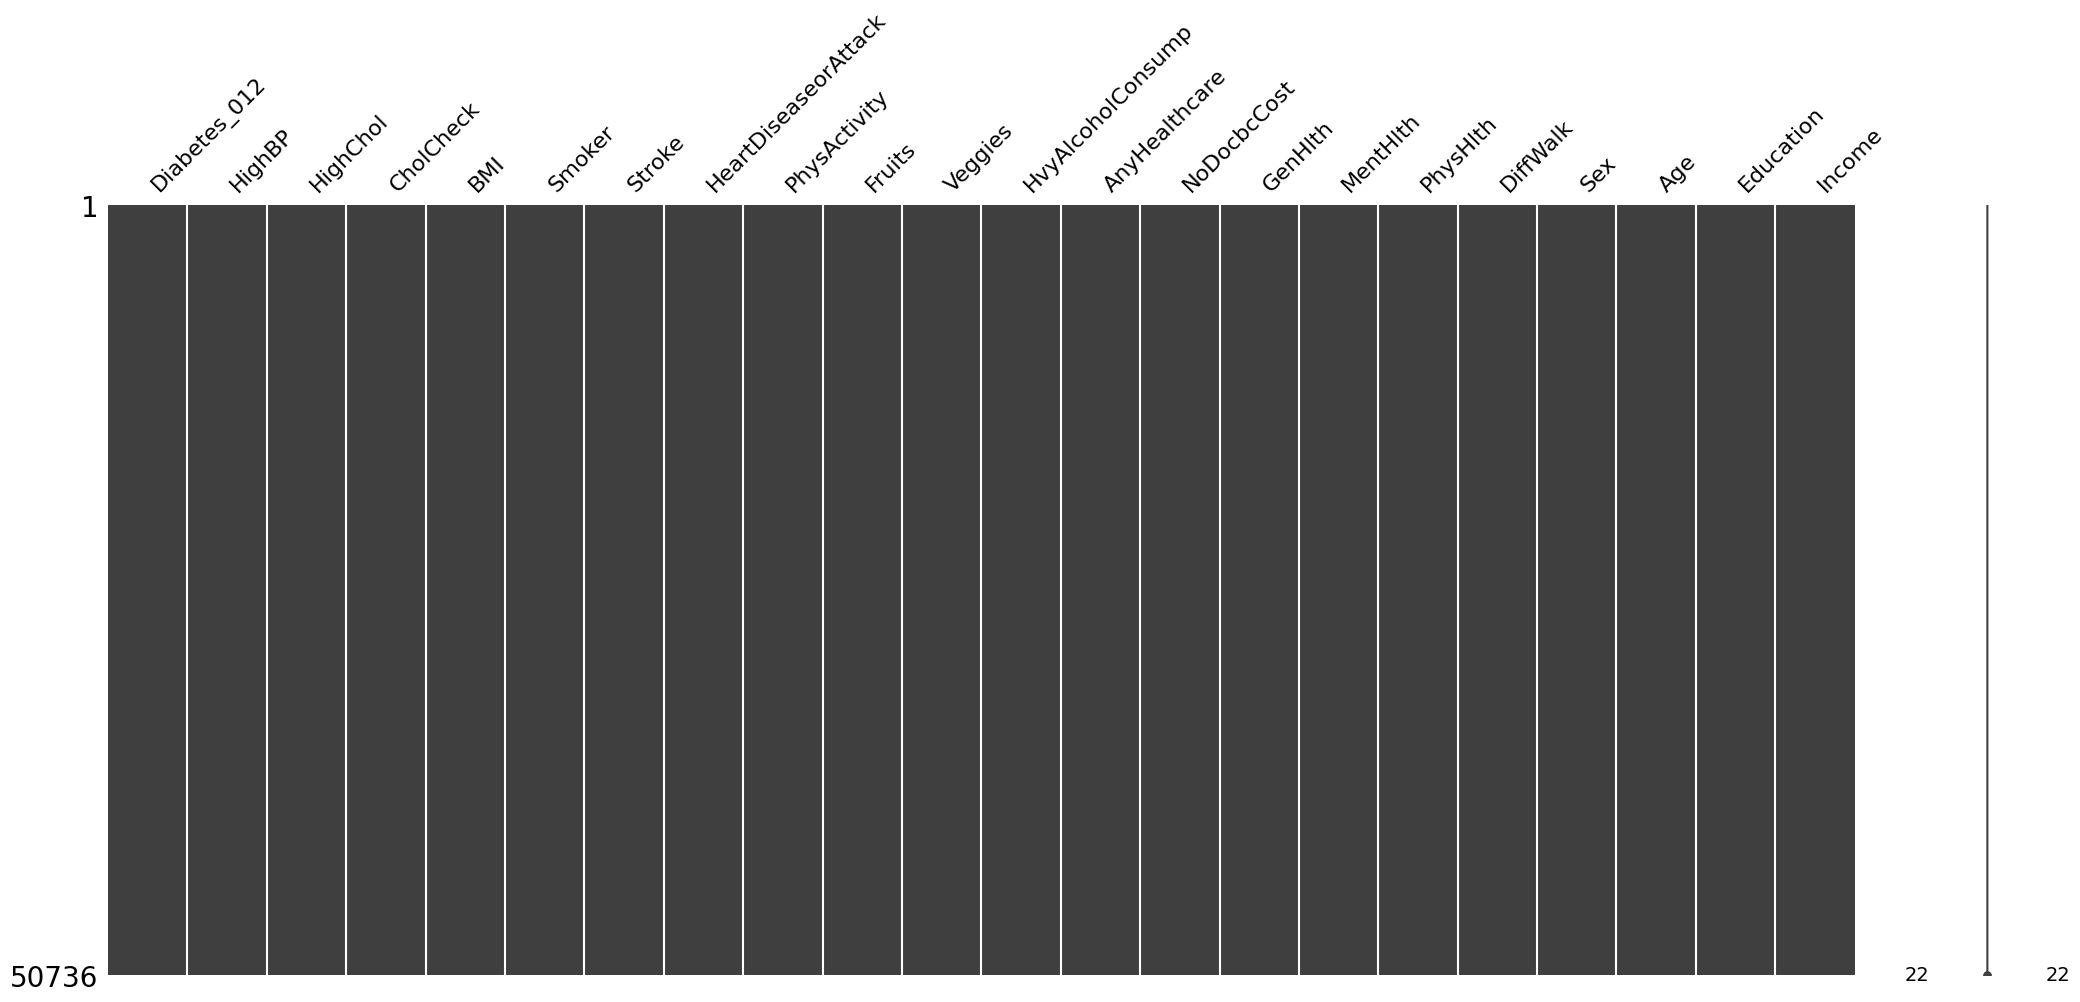

In [47]:
msno.matrix(Income)
plt.show()


In [48]:
Income['HighBP'].describe()

count    50736.000000
mean         0.429222
std          0.494970
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HighBP, dtype: float64

In [51]:
Income.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [49]:
Income['HighBP'].isnull().sum()

0

In [50]:
Income['Age']

147081    10.0
65219      9.0
145384     5.0
223580     8.0
184076    11.0
          ... 
237746     8.0
214760     9.0
170560     4.0
162208    10.0
59856      2.0
Name: Age, Length: 50736, dtype: float64

In [83]:
Income.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,50736.0,0.301817,0.703387,0.0,0.0,0.0,0.0,2.0
HighBP,50736.0,0.429222,0.494970,0.0,0.0,0.0,1.0,1.0
HighChol,50736.0,0.423762,0.494158,0.0,0.0,0.0,1.0,1.0
CholCheck,50736.0,0.963970,0.186366,0.0,1.0,1.0,1.0,1.0
BMI,50736.0,28.421890,6.662913,12.0,24.0,27.0,31.0,98.0
Smoker,50736.0,0.441994,0.496629,0.0,0.0,0.0,1.0,1.0
Stroke,50736.0,0.041608,0.199693,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,50736.0,0.094253,0.292183,0.0,0.0,0.0,0.0,1.0
PhysActivity,50736.0,0.754947,0.430123,0.0,1.0,1.0,1.0,1.0
Fruits,50736.0,0.635151,0.481393,0.0,0.0,1.0,1.0,1.0


In [78]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

imputer.fit(Income[['BMI']])

imputer.statistics_

array([28.42188978])

In [84]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'Income' is the original DataFrame and has the correct shape (50736, 22)
# Ensure that 'Income' is properly defined and has no issues.

# Initialize the SimpleImputer with the strategy to replace missing values with the median
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the 'Income' data and transform it
x = imputer.fit_transform(Income)

# Assuming 'Income' and 'Income_num' should have the same shape
# In case the columns and index of 'Income_num' are mismatched, we could use 'Income' itself
Income_num = Income  # Or another DataFrame with the correct shape

# Convert the NumPy array back into a DataFrame using the correct columns and index from 'Income_num'
Income_tr = pd.DataFrame(x, columns=Income.columns, index=Income.index)

# Display the first few rows of the new DataFrame 'Income_tr', which now has no missing values
Income_tr.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
147081,0.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,10.0,5.0,6.0
65219,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,5.0,0.0,0.0,1.0,9.0,6.0,8.0
145384,0.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,20.0,1.0,0.0,5.0,5.0,7.0
223580,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
184076,2.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,6.0,5.0


# Feature Scaling

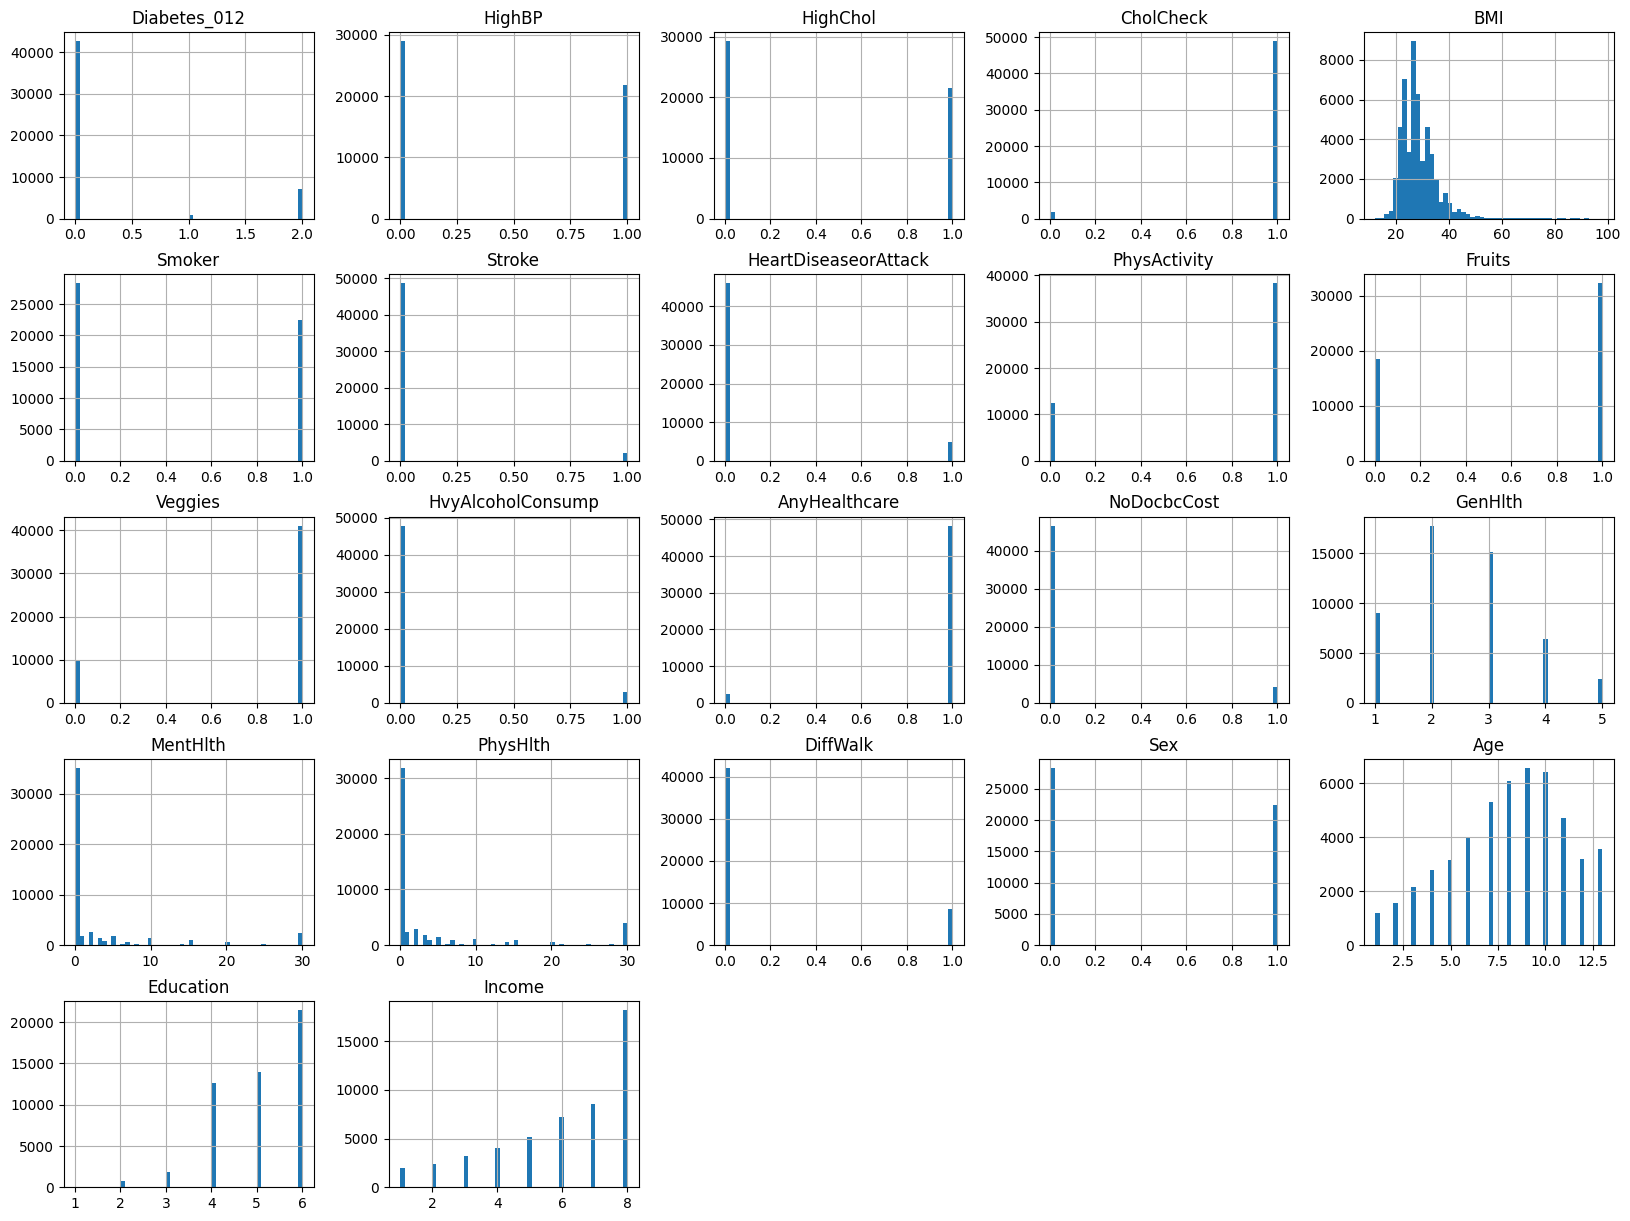

In [86]:
Income_tr.hist(bins=50, figsize=(20, 15))
plt.show()

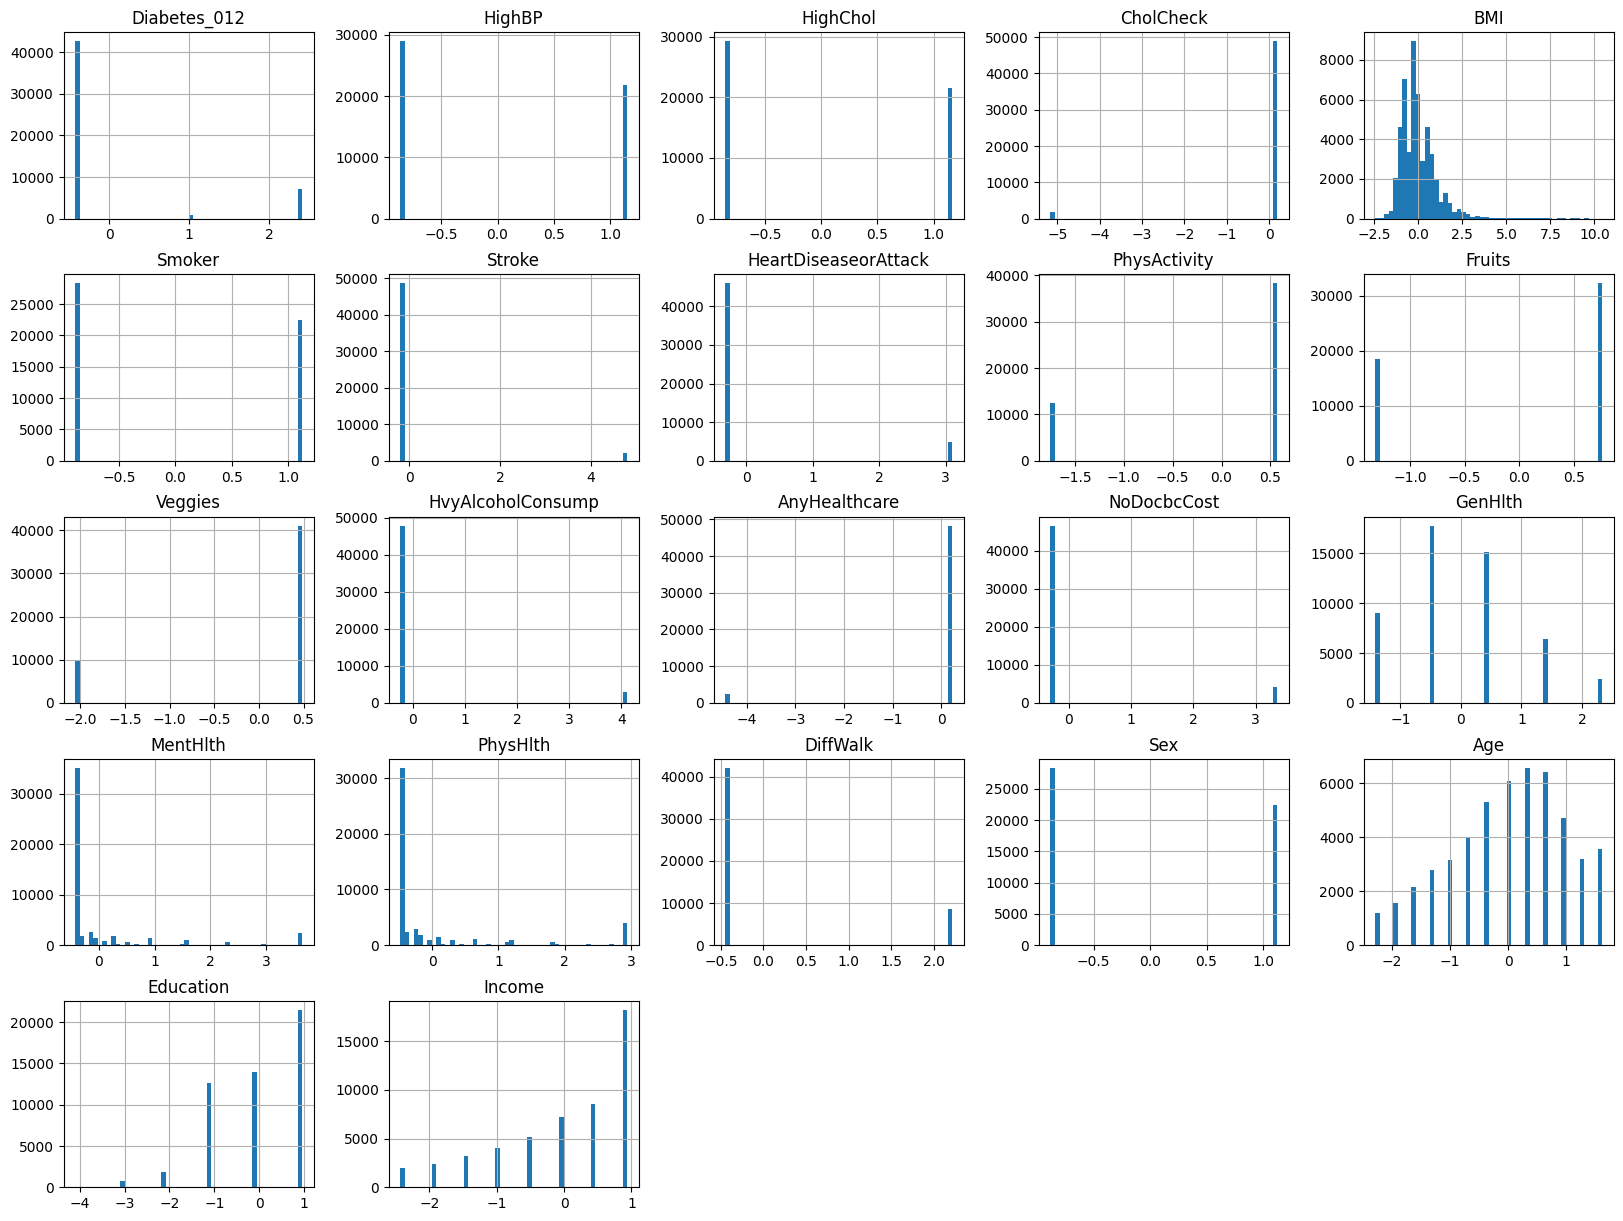

In [89]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
Income_std_scaled = std_scaler.fit_transform(Income_tr)

type(Income_std_scaled)

Income_std_scaled_df = pd.DataFrame(Income_std_scaled,
                                    columns=Income.columns,
                                    index=Income.index)

Income_std_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

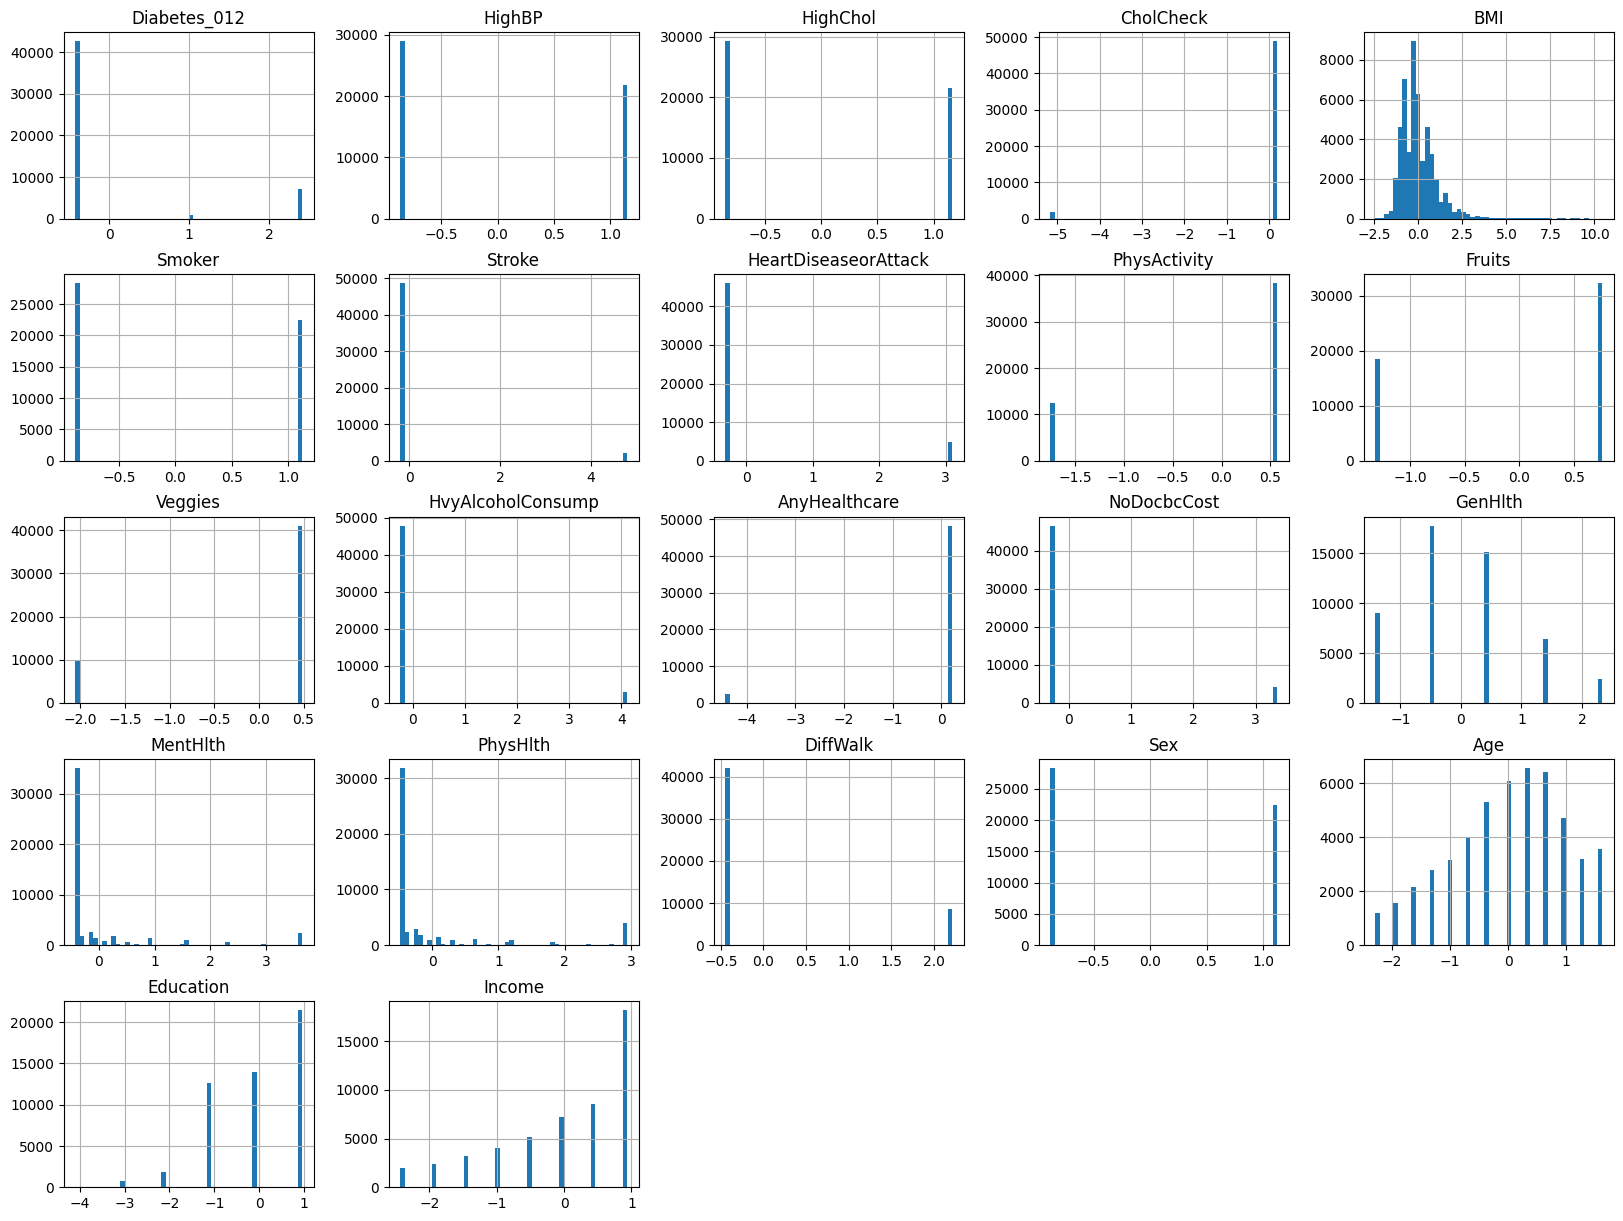

In [90]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = StandardScaler()
Income_min_max_scaled = min_max_scaler.fit_transform(Income_tr)

type(Income_min_max_scaled)

Income_min_max_scaled_df = pd.DataFrame(Income_min_max_scaled,
                                    columns=Income.columns,
                                    index=Income.index)

Income_min_max_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Handling Categorical Variables

In [92]:
Income.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [96]:
Income_health = Income[['MentHlth']]

In [101]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
Income_health_encoded = ordinal_encoder.fit_transform(Income_health)
type(Income_health_encoded)

Income_health_encode_df = pd.DataFrame(Income_health_encoded,
                                    columns=Income_health.columns,
                                    index=Income_health.index)

print(ordinal_encoder.categories_)

Income_health_encode_df.head()

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.])]


,MentHlth
147081,0.0
65219,5.0
145384,0.0
223580,0.0
184076,0.0


# Homework: Apply one hot encoding

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
pip install dtale

  Using cached dtale-3.13.1-py2.py3-none-any.whl.metadata (17 kB)
  Using cached dash_colorscales-0.0.4.tar.gz (62 kB)
  Preparing metadata (setup.py) ... done
  Using cached dash_daq-0.5.0.tar.gz (642 kB)
  Preparing metadata (setup.py) ... done
  Using cached Flask_Compress-1.15-py3-none-any.whl.metadata (8.4 kB)
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached kaleido-0.2.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
  Using cached squarify-0.4.4-py3-none-any.whl.metadata (600 bytes)
  Using cached strsimpy-0.2.1-py3-none-any.whl.metadata (20 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached flask_ngrok-0.0.25-py3-none-any.whl.metadata (1.8 kB)
  Using cached lz4-4.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.7 kB)
  Using cached dash_bootstrap_components-1.3.1-py3-none

In [23]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [39]:
import dtale
d = dtale.show(data)
d.open_browser()

2024-08-09 11:39:40,374 - INFO     - Executing shutdown due to inactivity...
2024-08-09 11:39:40,423 - INFO     - Executing shutdown...
2024-08-09 11:39:40,424 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
2024-08-09 11:39:40,530 - ERROR    - weakly-referenced object no longer exists
2024-08-09 11:39:40,531 - ERROR    - weakly-referenced object no longer exists
2024-08-09 11:39:40,532 - ERROR    - weakly-referenced object no longer exists
2024-08-09 11:39:40,533 - ERROR    - weakly-referenced object no longer exists
2024-08-09 11:39:40,535 - ERROR    - weakly-referenced object no longer exists
2024-08-09 11:39:40,537 - ERROR    - weakly-referenced object no longer exists
2024-08-09 11:39:40,539 - ERROR    - weakly-referenced object no longer exists
2024-08-09 11:39:40,540 - ERROR    - weakly-referenced object no longer exists
